In [3]:
import gym
import numpy as np
import torch as T
from DQN import Agent
from disc_env import DiffDriveEnv
from utils import plotLearning

# Define various variables

In [4]:
def convert_observation(dictonary):
    observation = np.zeros(7, dtype=np.float32)
    observation[0:5] = np.concatenate([dictonary['agent'], 
                                       dictonary['target']])
    observation[5] = dictonary['heading']
    observation[6] = dictonary['iterations']

    return observation

In [5]:
save_path = "models/"
save_file = "robot_model_0.pt"

In [6]:
# env.render_mode = "human"
get = ['agent', 'target', 'heading']
agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[7], lr=0.003)

In [15]:
global env
env = None

# objectives is a slider from 1 to 4 inclusive
default_objective = 2

env_types = ["sim", "real"]

def set_env(env_type, objective = default_objective):
    global env
    
    env = None
    
    if(objective == 1):
        env = DiffDriveEnv()
    
    elif(objective == 2):
        env = DiffDriveEnv()
    
    elif(objective == 3):
        env = DiffDriveEnv()
    
    elif(objective == 4):
        pass
    
    
    # if real or sim in
    if (env_type == env_types[0]):
        pass
    elif (env_type == env_types[1]):
        env.robot_type = "real"
    
    
    if (env == None):
        print("No environment setup") 
    else: 
        print("")

In [18]:
from ipywidgets import interact

print("Please set the environment type:")
interact(set_env, env_type=env_types , objective=(1, 4));

Please set the environment type:


interactive(children=(Dropdown(description='env_type', options=('sim', 'real'), value='sim'), IntSlider(value=…

# Training

In [ ]:
scores, eps_history = [], []
n_games = 2000
finished = 0

In [ ]:
for i in range(n_games):
    observation = np.zeros(6, dtype=np.float32)
    score = 0
    done = False
    observation, info = env.reset()     
    observation = convert_observation(observation)
#         for _ in range(50):
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info, completed = env.step(action)
        observation_ = convert_observation(observation_)
#             score += reward 
        agent.store_transition(observation, action, reward, 
                                observation_, done)
        agent.learn()
        observation = observation_
    scores.append(reward)
    if completed: 
            finished +=1
    eps_history.append(agent.epsilon)

    avg_score = np.mean(scores[-100:])
    if (i % 50 == 0) or (i == n_games):
        print('episode ', i, 'score %.2f' % reward,
                'average score %.2f' % avg_score, 'completed %d' % finished,
                'epsilon %.2f' % agent.epsilon)
        finished = 0

episode  0 score -58.06 average score -58.06 completed 0 epsilon 1.00
episode  50 score -54.31 average score -39.23 completed 4 epsilon 0.01


/home/terminator0117/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Parameter' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Parameter', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/terminator0117/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


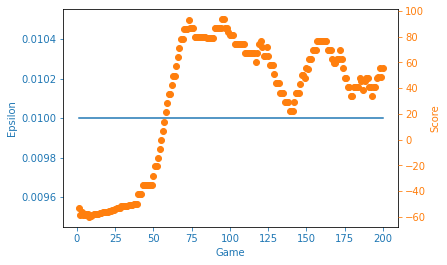

In [7]:
x = [i+1 for i in range(n_games)]
filename = 'results/score.png'
plotLearning(x, scores, eps_history, filename)

# Simulation

## Set Environment

In [8]:
env.render_mode = "human"
observation, info = env.reset() 

## Run

In [9]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info, completed = env.step(action)
    if completed:
        print("completed")

## Close

In [10]:
env.close()

# Real World

## Set Environment

In [ ]:
env.render_mode = "human"
env.robot_type = "real"
observation, info = env.reset()     

## Run

In [ ]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info, completed = env.step(action)
    if completed:
        print("completed")

## Close

In [ ]:
env.close()

# Save & Load Model
This code is mostly meant to be run out of order in the case someone wants to retrain a model or test a model

## Save

In [11]:
T.save(agent.state_dict(), save_path + save_file)

## Load

In [14]:
load_agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[7], lr=0.003)
load_agent.load_state_dict(T.load(save_path + save_file))

<All keys matched successfully>

# replace agent

In [ ]:
agent = load_agent